In [1]:
import torch 
import torch.nn as nn
import torchvision.transforms as transforms
import torchvision.datasets as dsets
import matplotlib.pylab as plt
import numpy as np

In [2]:
def PlotParameters(model):
    W = model.state_dict()['linear.weight'].data
    w_min = W.min().item()
    w_max = W.max().item()

    fig, axes = plt.subplots(2, 5)
    fig.subplots_adjust(hspace= 0.01, wspace= 0.1)
    
    for i, ax in enumerate(axes.flat):
        if i < 10:
            ax.set_xlabel('class: {0}'.format(i))
            ax.imshow(W[i,:].view(28, 28), vmin=w_min, vmax=w_max, cmap='seismic')

            ax.set_xticks([])
            ax.set_yticks([])

    plt.show()

In [15]:
def show_data(data_sample):
    plt.imshow(data_sample[0].numpy().reshape(28, 28), cmap='gray')
    plt.title('y = ' + str(data_sample[1]))

In [4]:
train_dataset = dsets.MNIST(root='./data', train=True, download=True, transform=transforms.ToTensor())
print("Print the training dataset:\n ", train_dataset)

100%|██████████| 9912422/9912422 [00:08<00:00, 1203442.27it/s]


Extracting ./data\MNIST\raw\train-images-idx3-ubyte.gz to ./data\MNIST\raw



100%|██████████| 28881/28881 [00:00<00:00, 3389453.92it/s]


Extracting ./data\MNIST\raw\train-labels-idx1-ubyte.gz to ./data\MNIST\raw



100%|██████████| 1648877/1648877 [00:02<00:00, 713100.53it/s] 


Extracting ./data\MNIST\raw\t10k-images-idx3-ubyte.gz to ./data\MNIST\raw



100%|██████████| 4542/4542 [00:00<?, ?it/s]

Extracting ./data\MNIST\raw\t10k-labels-idx1-ubyte.gz to ./data\MNIST\raw

Print the training dataset:
  Dataset MNIST
    Number of datapoints: 60000
    Root location: ./data
    Split: Train
    StandardTransform
Transform: ToTensor()


In [5]:
validation_dataset = dsets.MNIST(root='./data', download=True, transform=transforms.ToTensor())
print("Print the validating dataset:\n ", validation_dataset)

Print the validating dataset:
  Dataset MNIST
    Number of datapoints: 60000
    Root location: ./data
    Split: Train
    StandardTransform
Transform: ToTensor()


In [6]:
print("Type of data element: ", type(train_dataset[0][1]))

Type of data element:  <class 'int'>


In [7]:
print("The label: ", train_dataset[3][1])

The label:  1


The image:  None


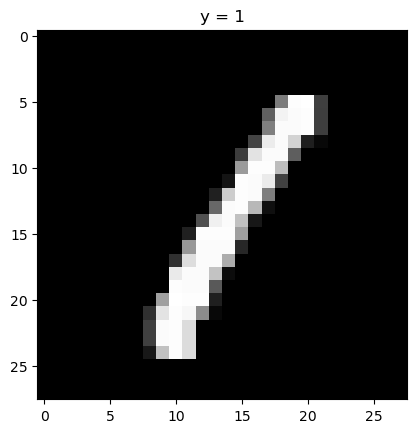

In [16]:
print("The image: ", show_data(train_dataset[3]))

In [17]:
class SoftMax(nn.Module):
    def __init__(self, input_size, output_size):
        super(SoftMax, self).__init__()
        self.linear = nn.Linear(input_size, output_size)

    def forward(self, x):
        z = self.linear(x)
        return z

In [18]:
train_dataset[0][0].shape

torch.Size([1, 28, 28])

In [19]:
input_dim = 28 * 28
output_dim = 10

In [20]:
model = SoftMax(input_dim, output_dim)
print('Model: \n', model)

Model: 
 SoftMax(
  (linear): Linear(in_features=784, out_features=10, bias=True)
)


In [21]:
print('W: ',list(model.parameters())[0].size())
print('b: ',list(model.parameters())[1].size())

W:  torch.Size([10, 784])
b:  torch.Size([10])


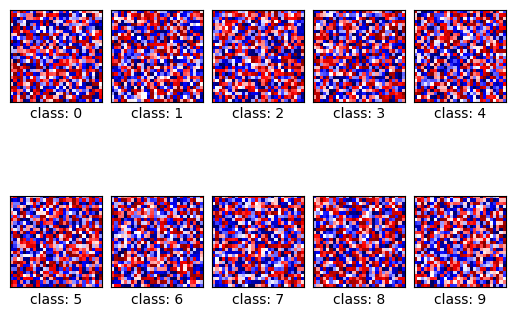

In [22]:
PlotParameters(model)

In [24]:
learning_rate = 0.1
optimizer = torch.optim.SGD(model.parameters(), lr = learning_rate)
criterion = nn.CrossEntropyLoss()
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=100)
test_loader = torch.utils.data.DataLoader(dataset=validation_dataset, batch_size=5000)

In [25]:
n_epochs = 10
loss_list = []
accuracy_list = []
N_test = len(validation_dataset)

In [28]:
def train_model(n_epochs):
    for epoch in range(n_epochs):
        for x,y in train_loader:
            optimizer.zero_grad()
            z = model(x.view(-1, 28*28))
            loss= criterion(z, y)
            loss.backward()
            optimizer.step()

        correct = 0
        for x_test, y_test in test_loader:
            z = model(x_test.view(-1, 28 * 28))
            _, yhat = torch.max(z.data, 1)
            correct += (yhat == y_test).sum().item()
        accuracy = correct / N_test
        loss_list.append(loss.data)
        accuracy_list.append(accuracy)

In [29]:
train_model(n_epochs)

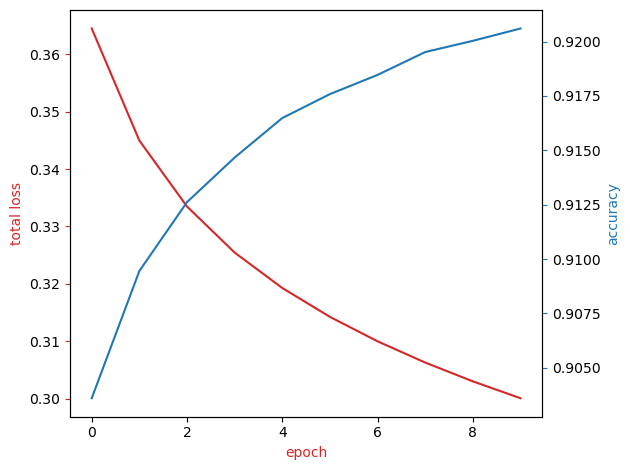

In [30]:
fig, ax1 = plt.subplots()
color = 'tab:red'
ax1.plot(loss_list,color=color)
ax1.set_xlabel('epoch',color=color)
ax1.set_ylabel('total loss',color=color)
ax1.tick_params(axis='y', color=color)
    
ax2 = ax1.twinx()  
color = 'tab:blue'
ax2.set_ylabel('accuracy', color=color)  
ax2.plot( accuracy_list, color=color)
ax2.tick_params(axis='y', color=color)
fig.tight_layout()

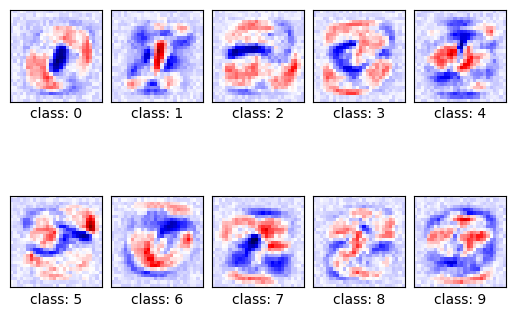

In [31]:
PlotParameters(model)

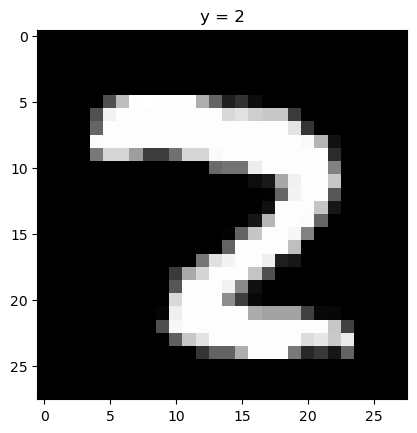

yhat: tensor([7])
probability of class  0.6674279570579529


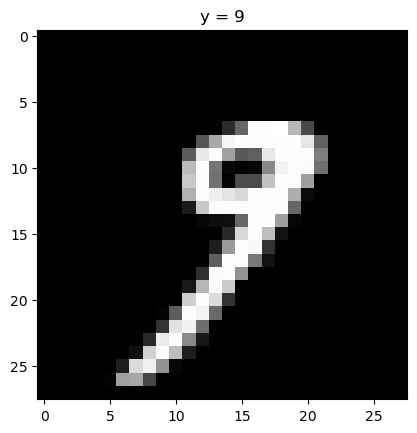

yhat: tensor([7])
probability of class  0.7166351079940796


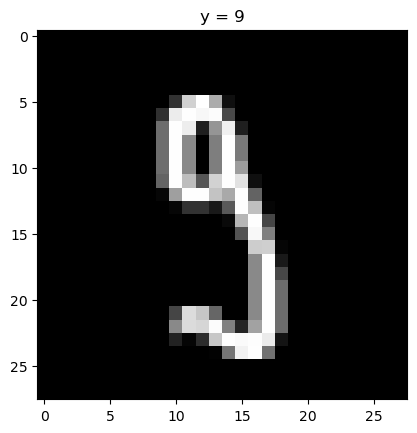

yhat: tensor([5])
probability of class  0.7298286557197571


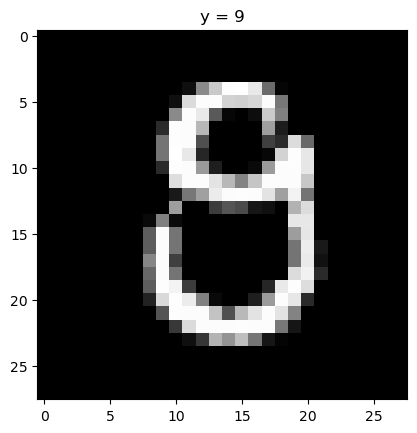

yhat: tensor([8])
probability of class  0.3736562430858612


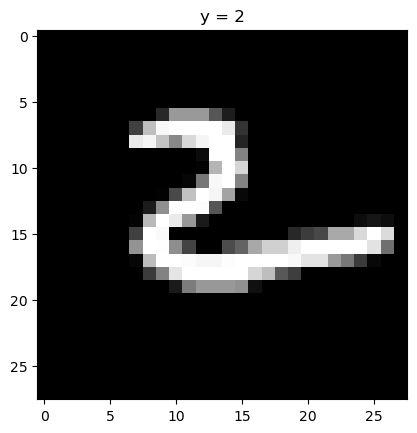

yhat: tensor([6])
probability of class  0.511275589466095


In [32]:
Softmax_fn=nn.Softmax(dim=-1)
count = 0
for x, y in validation_dataset:
    z = model(x.reshape(-1, 28 * 28))
    _, yhat = torch.max(z, 1)
    if yhat != y:
        show_data((x, y))
        plt.show()
        print("yhat:", yhat)
        print("probability of class ", torch.max(Softmax_fn(z)).item())
        count += 1
    if count >= 5:
        break   

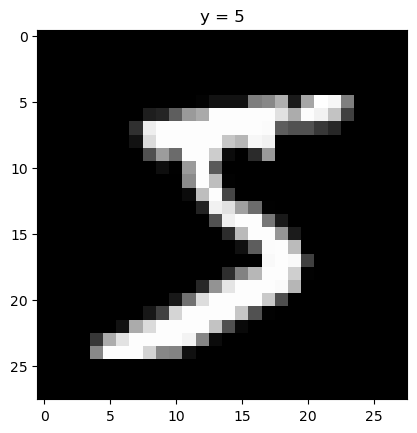

yhat: tensor([5])
probability of class  0.8524650931358337


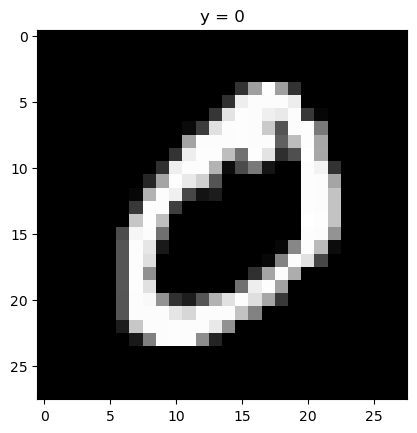

yhat: tensor([0])
probability of class  0.9997178912162781


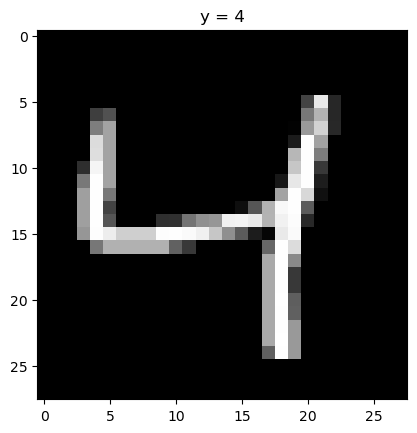

yhat: tensor([4])
probability of class  0.871556282043457


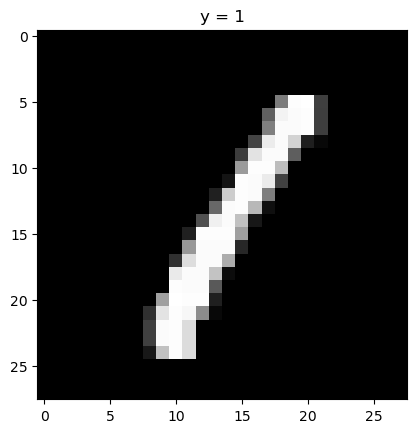

yhat: tensor([1])
probability of class  0.9646725058555603


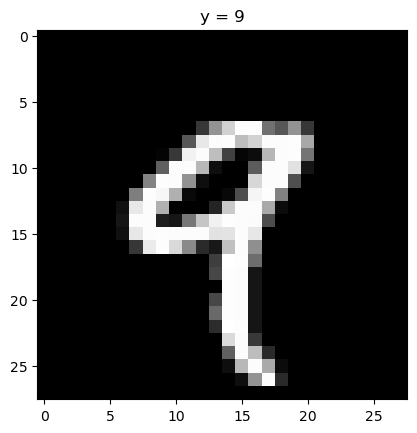

yhat: tensor([9])
probability of class  0.9285392165184021


In [33]:
Softmax_fn=nn.Softmax(dim=-1)
count = 0
for x, y in validation_dataset:
    z = model(x.reshape(-1, 28 * 28))
    _, yhat = torch.max(z, 1)
    if yhat == y:
        show_data((x, y))
        plt.show()
        print("yhat:", yhat)
        print("probability of class ", torch.max(Softmax_fn(z)).item())
        count += 1
    if count >= 5:
        break  